In [1]:
from matplotlib import pyplot as plt 

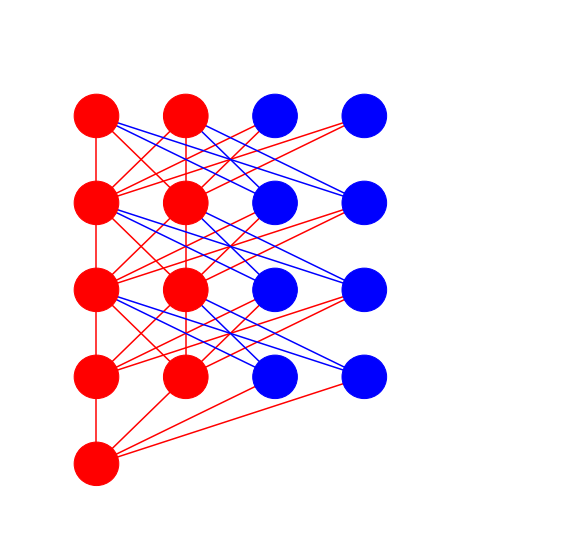

In [73]:
chain_length = 4
npops = 2

R_CIRC = 4
H_DIST = 16
V_DIST = 16

plt.figure(figsize=(10, 10))
plt.axis([0, 100, 0, 100])
plt.axis("off")

def create_neuron(cur_loc, inh=False):
    color = 'red'
    if inh:
        color = 'blue'

    circ = plt.Circle(
            cur_loc, 
            radius=R_CIRC,
            color=color,
            zorder=2
    )
    plt.gca().add_artist(circ)

def connect_to_next_layer(cur_loc, height, inh=False):
    color = 'red'
    all_neurons_factor = 2
    if inh:
        all_neurons_factor = 1
        color = 'blue'
    for p in range(1, (all_neurons_factor * npops) + 1):
        next_loc = p * H_DIST, (height + 2) * V_DIST
        plt.plot(
            [cur_loc[0], next_loc[0]], 
            [cur_loc[1], next_loc[1]], 
            color=color
        )
    
def create_initial_neurons():
    init_exc_loc = H_DIST, V_DIST
    #init_inh_loc = 2 * H_DIST, V_DIST

    create_neuron(init_exc_loc, inh=False)
    connect_to_next_layer(init_exc_loc, 0, inh=False)
    #create_neuron(init_inh_loc, inh=True)
    #connect_to_next_layer(init_inh_loc, 0, inh=True)

create_initial_neurons()
    
for c in range(chain_length):
    # Exhibitors
    for p in range(1, npops + 1):
        cur_loc = p * H_DIST, (c + 2) * V_DIST
        
        create_neuron(cur_loc, inh=False)
        if not c == chain_length -1:
            connect_to_next_layer(cur_loc, c + 1, inh=False)

    # Inhibitors
    for p in range(1, npops + 1):
        cur_loc = (npops + p) * H_DIST, (c + 2) * V_DIST
        
        create_neuron(cur_loc, inh=True)
        if not c == chain_length -1:
            connect_to_next_layer(cur_loc, c + 1, inh=True)

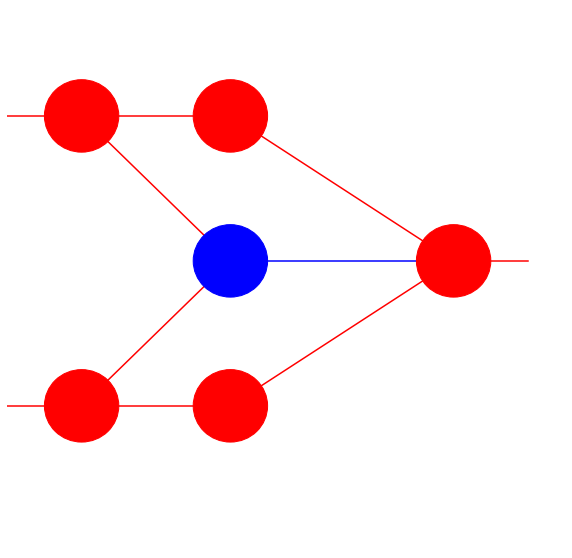

In [108]:
plt.figure(figsize=(10, 10))
plt.axis([0, 60, 0, 60])
plt.axis("off")

ex01 = (0.5 * H_DIST, V_DIST)
ex02 = (0.5 * H_DIST, 3 * V_DIST)

ex1 = (H_DIST * 1.5, 1 * V_DIST)
inh1 = (H_DIST * 1.5, 2 * V_DIST)
ex2 = (H_DIST * 1.5, 3 * V_DIST)
ex3 = (3 * H_DIST, 2 * V_DIST)

create_neuron(ex01, inh=False)
create_neuron(ex02, inh=False)
create_neuron(ex1, inh=False)
create_neuron(inh1, inh=True)
create_neuron(ex2, inh=False)
create_neuron(ex3, inh=False)

plt.plot((0, ex01[0]), (ex01[1], ex01[1]), color='red')
plt.plot((0, ex02[0]), (ex02[1], ex02[1]), color='red')

plt.plot((ex01[0], ex1[0]), (ex01[1], ex1[1]), color='red')
plt.plot((ex01[0], inh1[0]), (ex01[1], inh1[1]), color='red')
plt.plot((ex02[0], inh1[0]), (ex02[1], inh1[1]), color='red')
plt.plot((ex02[0], ex2[0]), (ex02[1], ex2[1]), color='red')

plt.plot((ex1[0], ex3[0]), (ex1[1], ex3[1]), color='red')
plt.plot((inh1[0], ex3[0]), (inh1[1], ex3[1]), color='blue')
plt.plot((ex2[0], ex3[0]), (ex2[1], ex3[1]), color='red')

plt.plot((ex3[0], ex3[0] + .5 * H_DIST), (ex3[1], ex3[1]), color='red')